In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. Parámetros del dataset
BATCH_SIZE = 32
IMG_HEIGHT = 240
IMG_WIDTH = 320
NUM_CLASSES = 3

# 2. Cargar los datos desde las carpetas
train_dataset = tf.keras.utils.image_dataset_from_directory(
    './dataset/train',
    validation_split=None,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical' # N-Clases
)

# Son fotos que el modelo nunca usa para aprender.
# Es el examen de prueba, resolviendo el overfitting
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    './dataset/validation',
    validation_split=None,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

class_names = train_dataset.class_names
print("Clases a trabajar: ", class_names)

# 3. Optimizar el rendimiento de carga
#Cuantos lotes hay que precargar
AUTOTUNE = tf.data.AUTOTUNE
#Guardamos los datos en la memoria RAM para acelerar el proceso de entrenamiento
#con shuffle, barajamos las imagenes de entrenamiento. ya que no queremos que lea todas las imagnees en orden porque se sesgará 
#prefetch, es una cola que prepara las img para el siguiente entrenamiento
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# 4. Led recognition
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), 
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    layers.Conv2D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'), 
    layers.Dropout(0.5), 
    layers.Dense(NUM_CLASSES, activation='softmax') 
])

model.summary()


Found 2380 files belonging to 3 classes.
Found 378 files belonging to 3 classes.
Clases a trabajar:  ['blue_on', 'off', 'red_on']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 240, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 240, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 240, 320, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 240, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 240, 320, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 120, 160, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 120, 160, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 60, 80, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 80, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 38400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,457,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,465,267 (9.40 MB)

 Trainable params: 2,465,267 (9.40 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 1. Compilar el modelo
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

# 2. Entrenar el modelo
EPOCHS = 10

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)

# 3. Guardar el modelo entrenado
model.save('mi_modelo_leds.h5')
print("Modelo guardado como 'mi_modelo_leds.h5'!")


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 562ms/step - accuracy: 0.5378 - loss: 0.9769 - val_accuracy: 0.4788 - val_loss: 1.0632
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 576ms/step - accuracy: 0.6315 - loss: 0.8196 - val_accuracy: 0.5661 - val_loss: 1.0148
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 553ms/step - accuracy: 0.7046 - loss: 0.7267 - val_accuracy: 0.3968 - val_loss: 1.1908
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 534ms/step - accuracy: 0.7118 - loss: 0.6662 - val_accuracy: 0.4868 - val_loss: 1.0220
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 590ms/step - accuracy: 0.7504 - loss: 0.5921 - val_accuracy: 0.4974 - val_loss: 1.1763
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 586ms/step - accuracy: 0.7689 - loss: 0.5622 - val_accuracy: 0.5026 - val_loss: 1.3564
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 588ms/step - accuracy: 0.7824 - loss: 0.5016 - val_accuracy: 0.6825 - val_loss: 0.9343
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 581ms/step - accuracy: 0.8227 - loss: 0.4224 - val_accu

Modelo guardado como 'mi_modelo_leds.h5'!


Cargando modelo...
¡Modelo cargado!
--- Iniciando Predicciones ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Foto:     img_20251127_230637_862722.jpg
Esperado: red_on
Predicho: red_on (36.16%)
Resultado: ¡CORRECTO!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Foto:     img_20251127_230533_598784.jpg
Esperado: off
Predicho: blue_on (41.23%)
Resultado: ¡¡INCORRECTO!!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Foto:     img_20251127_230706_581970.jpg
Esperado: blue_on
Predicho: blue_on (56.32%)
Resultado: ¡CORRECTO!

--- Predicciones completadas ---


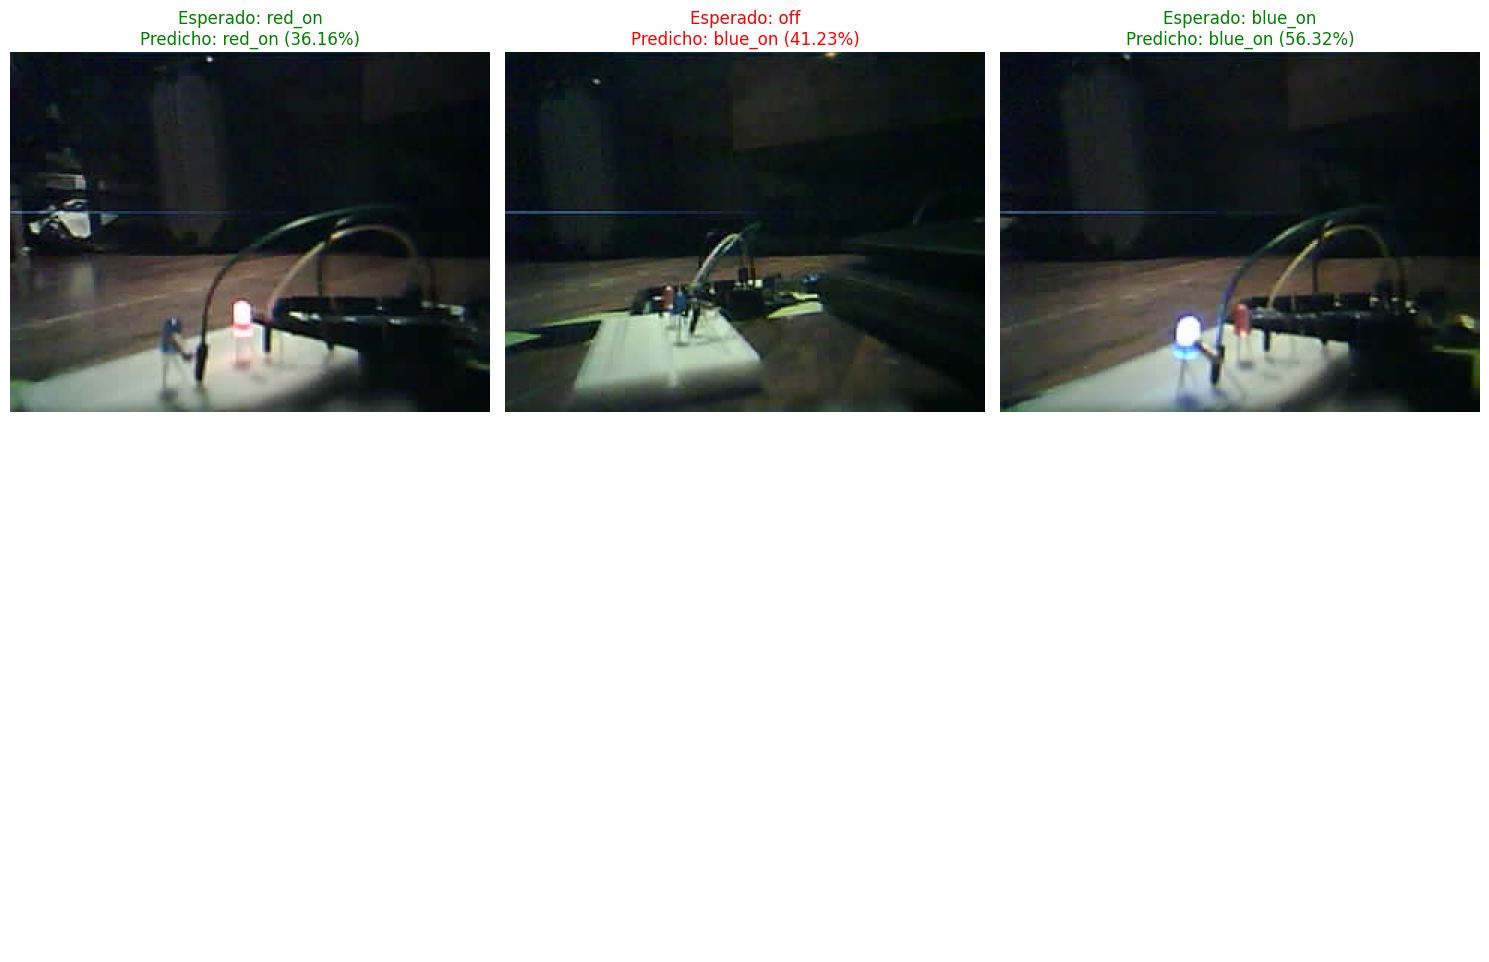

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN ---
MODEL_PATH = 'mi_modelo_leds.h5'
IMG_HEIGHT = 240  # El alto que usaste para entrenar
IMG_WIDTH = 320   # El ancho que usaste para entrenar

CLASS_NAMES = [
    'blue_on', 'off', 'red_on'
]

# (Ruta, Etiqueta Esperada)
TEST_IMAGES = [
    ('./dataset/validation/red_on/img_20251127_230637_862722.jpg', 'red_on'),
    ('./dataset/validation/off/img_20251127_230533_598784.jpg', 'off'),
    ('./dataset/validation/blue_on/img_20251127_230706_581970.jpg', 'blue_on')
]
# --- 2. Cargar modelo (solo una vez) ---
print("Cargando modelo...")
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print("¡Modelo cargado!")
except IOError:
    print(f"Error: No se pudo cargar el modelo desde {MODEL_PATH}")
    exit()


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() # Convertir la cuadrícula 2D en una lista 1D

print("--- Iniciando Predicciones ---")

# --- 3. Bucle para procesar cada imagen ---
for i, (image_path, expected_label) in enumerate(TEST_IMAGES):
    
    ax = axes[i] # Seleccionar el subplot actual
    
    # Cargar la imagen usando OpenCV
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error al cargar: {image_path}\n")
        ax.set_title(f"Error al cargar imagen", color='r')
        ax.axis('off')
        continue
        
    # OpenCV lee en BGR, Keras/Matplotlib usan RGB.
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- ¡CORREGIDO! El orden de resize en CV2 es (ANCHO, ALTO) ---
    img_resized = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT))

    # Convertir a un "lote" (batch) de 1 imagen
    img_batch = np.expand_dims(img_resized, axis=0)

    # --- 4. Realizar la Predicción ---
    predictions = model.predict(img_batch)
    score = tf.nn.softmax(predictions[0])
    
    predicted_class = CLASS_NAMES[np.argmax(score)]
    confidence = 100 * np.max(score)

    # --- 5. Mostrar Resultados ---
    
    # Imprimir en la consola
    print(f"Foto:     {image_path.split('/')[-1]}")
    print(f"Esperado: {expected_label}")
    print(f"Predicho: {predicted_class} ({confidence:.2f}%)")
    
    if predicted_class == expected_label:
        print("Resultado: ¡CORRECTO!\n")
        title_color = 'green'
    else:
        print("Resultado: ¡¡INCORRECTO!!\n")
        title_color = 'red'

    # Mostrar en la gráfica
    ax.imshow(img_rgb) # Mostramos la original
    ax.set_title(
        f"Esperado: {expected_label}\nPredicho: {predicted_class} ({confidence:.2f}%)", 
        color=title_color
    )
    ax.axis("off")

# Apagar los ejes (subplots) que no se usaron
for j in range(len(TEST_IMAGES), len(axes)):
    axes[j].axis('off')

print("--- Predicciones completadas ---")
plt.tight_layout()
plt.show()

2025-11-29 14:32:26.291405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-29 14:32:28.326737: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Cargando modelo...
Cargando datos de validación...
Found 378 files belonging to 3 classes.
Clases: ['blue_on', 'off', 'red_on']
Generando predicciones...


2025-11-29 14:32:30.945884: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


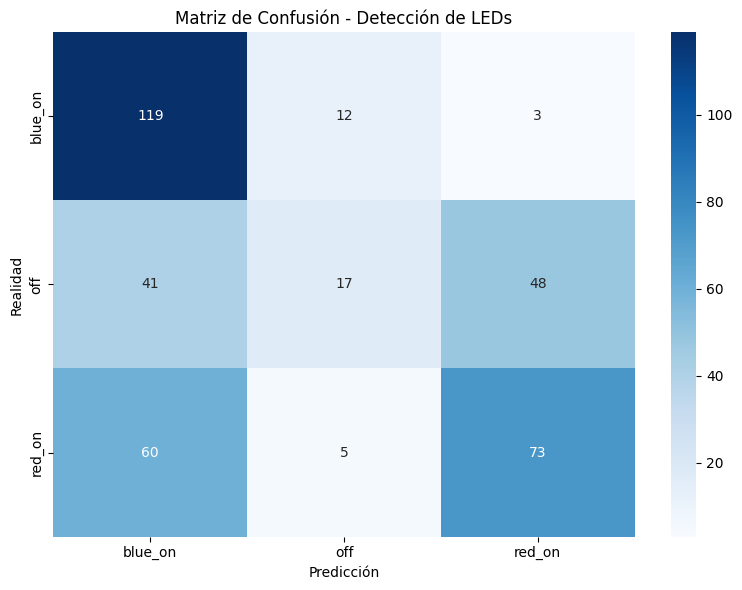

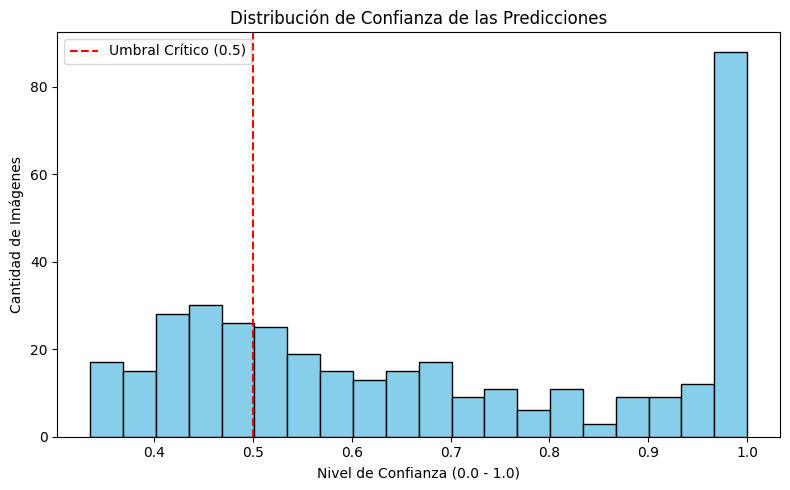


--- REPORTE DE CLASIFICACIÓN ---
              precision    recall  f1-score   support

     blue_on       0.54      0.89      0.67       134
         off       0.50      0.16      0.24       106
      red_on       0.59      0.53      0.56       138

    accuracy                           0.55       378
   macro avg       0.54      0.53      0.49       378
weighted avg       0.55      0.55      0.51       378



"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\nloss = history.history['loss']\nval_loss = history.history['val_loss']\nepochs_range = range(len(acc))\n\nplt.figure(figsize=(12, 5))\n\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Precisión (Accuracy) durante Entrenamiento')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Pérdida (Loss) durante Entrenamiento')\nplt.savefig('curvas_aprendizaje.png')\nplt.show()\n"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# --- CONFIGURACIÓN ---
# Asegúrate de que estas variables tengan los mismos valores que en tu entrenamiento
IMG_HEIGHT = 240
IMG_WIDTH = 320
BATCH_SIZE = 32
MODEL_PATH = 'mi_modelo_leds.h5'

# 1. Cargar el Modelo
print("Cargando modelo...")
model = tf.keras.models.load_model(MODEL_PATH)

# 2. Cargar Datos de Validación (Para evaluar)
print("Cargando datos de validación...")
val_ds = tf.keras.utils.image_dataset_from_directory(
    './dataset/validation',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False # ¡IMPORTANTE! No mezclar para poder comparar ordenado
)

class_names = val_ds.class_names
print(f"Clases: {class_names}")

# 3. Obtener Predicciones Reales
print("Generando predicciones...")
y_true = [] # Etiquetas reales
y_pred = [] # Predicciones del modelo
y_conf = [] # Nivel de confianza

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    
    # Guardar etiquetas reales (indice del 1 en el one-hot)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    
    # Guardar predicciones (indice del valor mas alto)
    y_pred.extend(np.argmax(preds, axis=1))
    
    # Guardar confianza (valor mas alto)
    y_conf.extend(np.max(preds, axis=1))

# --- GENERACIÓN DE GRÁFICOS ---

# GRÁFICO 1: Matriz de Confusión
# Muestra qué tanto se confunde el modelo entre clases
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión - Detección de LEDs')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.tight_layout()
plt.savefig('matriz_confusion.png') # Guarda la imagen
plt.show()

# GRÁFICO 2: Histograma de Confianza
# Muestra cuán "seguro" está el modelo de sus decisiones
plt.figure(figsize=(8, 5))
plt.hist(y_conf, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Confianza de las Predicciones')
plt.xlabel('Nivel de Confianza (0.0 - 1.0)')
plt.ylabel('Cantidad de Imágenes')
plt.axvline(x=0.5, color='red', linestyle='--', label='Umbral Crítico (0.5)')
plt.legend()
plt.tight_layout()
plt.savefig('histograma_confianza.png')
plt.show()

# REPORTE DE TEXTO (Métricas de Precisión/Recall)
print("\n--- REPORTE DE CLASIFICACIÓN ---")
print(classification_report(y_true, y_pred, target_names=class_names))

# GRÁFICO 3: Curvas de Entrenamiento (SOLO SI TIENES 'history')
# Si acabas de entrenar y tienes la variable 'history' en memoria, descomenta esto:
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Precisión (Accuracy) durante Entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Pérdida (Loss) durante Entrenamiento')
plt.savefig('curvas_aprendizaje.png')
plt.show()
"""